In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

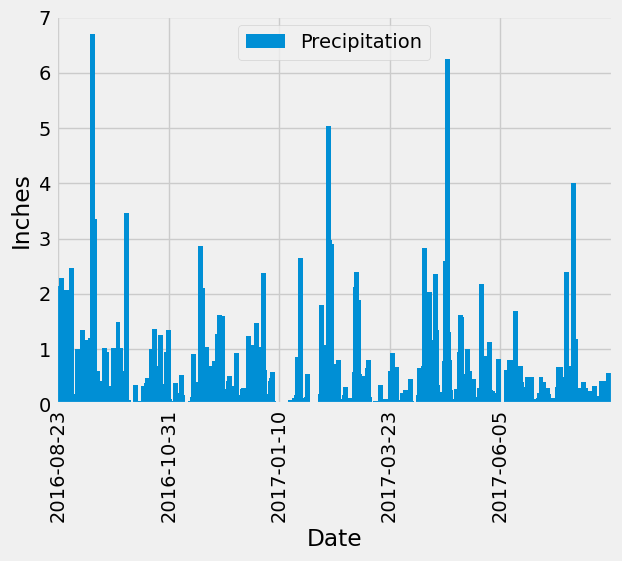

<Figure size 640x480 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= dt.date(2017,8,23) - dt.timedelta(days=365)).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_scores, columns=["Date", "Precipitation"])

# Sort the dataframe by date
precipitation_df.sort_values(by="Date", inplace=True)

# Create variables for dates and precipitation
dates = precipitation_df["Date"]
precipitation = precipitation_df["Precipitation"]

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(kind="bar", x="Date", y="Precipitation", width=20)
                     
# Add xticks. Divide dates length by 5 for 5 xticks
plt.xticks(np.arange(0,len(dates), len(dates) // 5))


# Add labels, legend, and show the graph
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.show()
plt.tight_layout()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df["Precipitation"].describe()
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df 

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station))\
        .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps_most_active = session.query(func.min(measurement.tobs),
                                  func.max(measurement.tobs),
                                  func.avg(measurement.tobs)).\
                                filter(measurement.station == "USC00519281").all()
temps_most_active

[(54.0, 85.0, 71.66378066378067)]

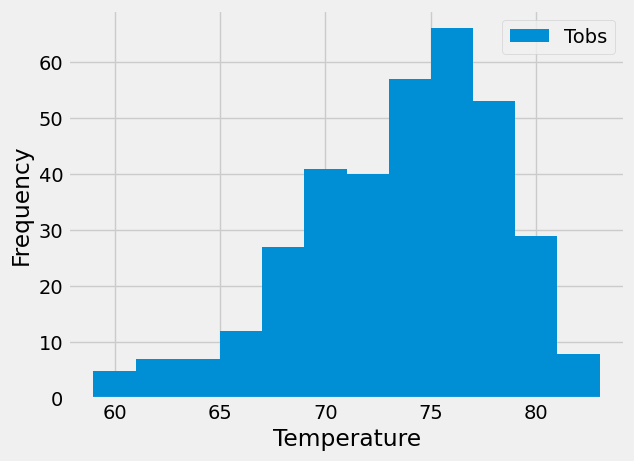

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_scores_most_active = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= dt.date(2017,8,23) - dt.timedelta(days=365)).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

temp_most_active_df = pd.DataFrame(temp_scores_most_active, columns=["Date", "Tobs"])

plt.hist(temp_most_active_df["Tobs"], bins=12, label="Tobs")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()